In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
DATA_PATH = Path() / "data"
DATA_PATH.mkdir(parents=True,exist_ok=True)

def load_data(filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    return pd.read_csv(csv_path,encoding=encoding)

def save_data(data, filename, data_path=DATA_PATH):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False)


In [3]:
PLOT_PATH = Path() / "plot"
PLOT_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, transparent=True):
    path = PLOT_PATH / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, transparent=transparent)

In [4]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
import re
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/yvette/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/yvette/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
# Download NLTK resources (stopwords and tokenizer)
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stemmer
stemmer = PorterStemmer()

# Get English stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /Users/yvette/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yvette/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# stop_words = {
#     'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your',
#     'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it',
#     "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
#     'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
#     'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
#     'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
#     'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
#     'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
#     'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will',
#     'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't",
#     'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
#     'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',
#     "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
# }

In [7]:
# def pre_process(text):
    
#     # lowercase
#     text=str(text).lower()

#     # remove numbers followed by dot (like, "1.", "2.", etc)
#     text=re.sub('((\d+)[\.])', '', text)
    
#     #remove tags
#     text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
#     # correct some misspellings and/or replace some text with others that might be easier to handle
#     text=text.replace('do not', "don't")
    
#     # remove special characters except spaces, apostrophes and dots
#     text=re.sub(r"[^a-zA-Z0-9.']+", ' ', text)
    
#     # remove stopwords
#     text=[word for word in text.split(' ') if word not in stop_words]

#     # Basic tokenization by splitting the text
#     tokens = text.split()

#     # Remove stop words and apply stemming (rudimentary by chopping off common suffixes)
#     filtered_tokens = [word if not word.endswith(('ing', 'ly', 'ed', 's')) else word[:-2] for word in tokens if word not in stop_words]
    
#     # lemmatize
#     lmtzr = WordNetLemmatizer()
#     text = ' '.join((lmtzr.lemmatize(i)) for i in filtered_tokens)
    
#     return text

In [8]:

def pre_process(text):
    # Convert to lowercase
    text = str(text).lower()

    # Remove numbers followed by dots
    text = re.sub(r'(\d+\.)', '', text)
    
    # Remove HTML-like tags
    text = re.sub("&lt;/?.*?&gt;", " ", text)
    
    # Replace specific text patterns
    text = text.replace('do not', "don't")
    
    # Remove special characters, keeping spaces, apostrophes, and dots
    text = re.sub(r"[^a-zA-Z0-9.']+", ' ', text)
    
    # Tokenize and remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]
    
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Apply lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Re-join tokens into a single string
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text


In [9]:
data = pd.read_csv('/Users/yvette/Downloads/McDonald_s_Reviews.csv', sep=',', encoding='ISO-8859-1')
data.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [10]:
# Apply the basic preprocessing to the review column
data['processed_review_basic'] = data['review'].apply(pre_process)

# Display the first few rows of the dataset to show the processed reviews
data[['review', 'processed_review_basic']].head()

,review,processed_review_basic
0,Why does it look like someone spit on my food?...,look like someone spit food normal transaction...
1,It'd McDonalds. It is what it is as far as the...,it'd mcdonalds. far food atmosphere go. staff ...
2,Made a mobile order got to the speaker and che...,made mobile order got speaker checked in. line...
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,mc. crispy chicken sandwich customer service q...
4,"I repeat my order 3 times in the drive thru, a...",repeat order 3 time drive thru still manage me...


In [11]:
data['rating_numeric'] = data['rating'].apply(lambda x: int(x.split()[0]) if pd.notnull(x) and x.split()[0].isdigit() else None)
data['rating_numeric'].value_counts().sort_index()


rating_numeric
1     9431
2     3086
3     4818
4     5787
5    10274
Name: count, dtype: int64

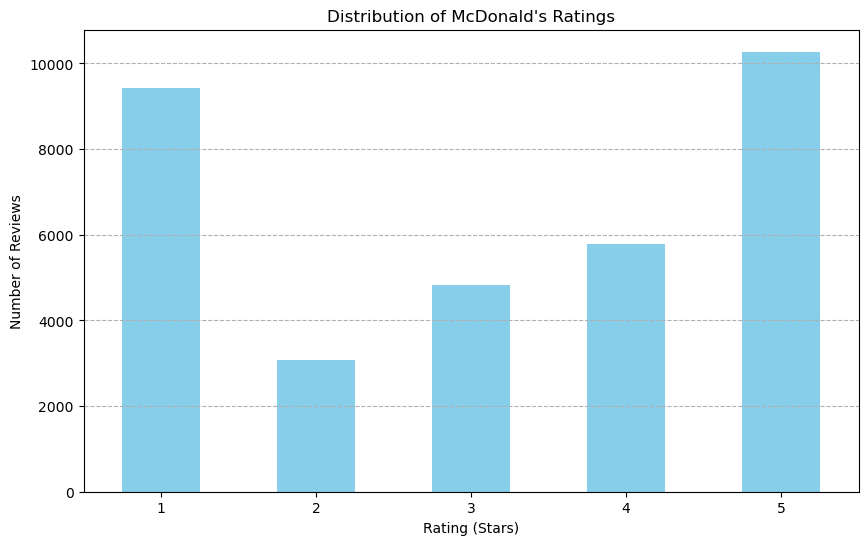

In [12]:
import matplotlib.pyplot as plt

# Plotting the distribution of numeric ratings
data['rating_numeric'].value_counts().sort_index().plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Distribution of McDonald\'s Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

plt.show()


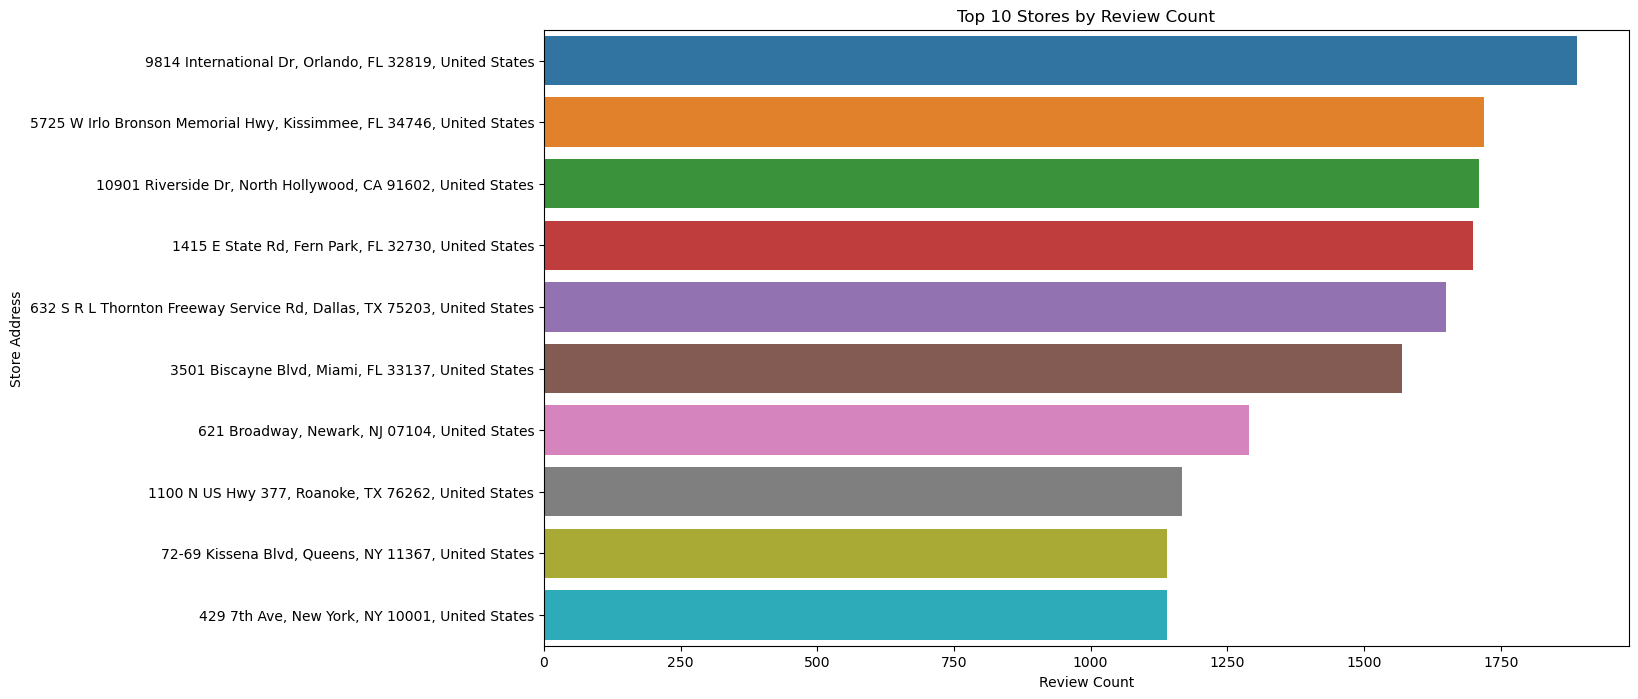

In [13]:
# Review counts per store
import seaborn as sns
plt.figure(figsize=(14, 8))
reviews_per_store = data['store_address'].value_counts().head(10)  # Top 10 stores by review count
sns.barplot(x=reviews_per_store.values, y=reviews_per_store.index)
plt.title('Top 10 Stores by Review Count')
plt.xlabel('Review Count')
plt.ylabel('Store Address')
plt.show()


In [14]:
from datetime import datetime, timedelta
current_date = datetime.now()
def parse_review_time_updated(review_time):
    review_time = review_time.replace('a ', '1 ').replace('one ', '1 ')

    if 'years' in review_time or 'year' in review_time:
        years = int(review_time.split()[0])
        return current_date - timedelta(days=365*years)
    elif 'months' in review_time:
        months = int(review_time.split()[0])
        return current_date - timedelta(days=30*months) 
    elif 'month' in review_time:
        return current_date - timedelta(days=30)  # "1 month ago" 近似为30天
    elif 'days' in review_time or 'day' in review_time:
        days = int(review_time.split()[0])
        return current_date - timedelta(days=days)
    else:
        return current_date


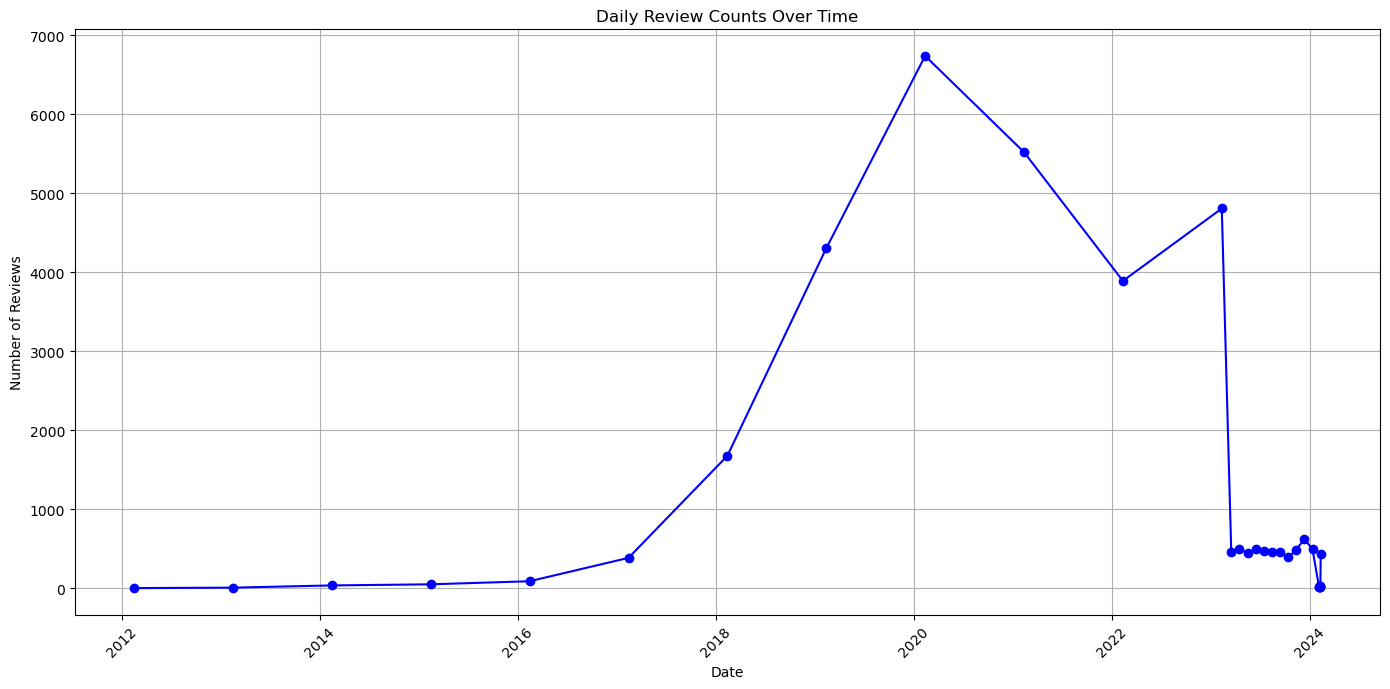

In [15]:
data['approx_review_date'] = data['review_time'].apply(parse_review_time_updated)
data['approx_review_date'] = data['approx_review_date'].dt.date
daily_reviews_count = data.groupby('approx_review_date').size()

plt.figure(figsize=(14, 7))
daily_reviews_count.plot(kind='line', color='blue', marker='o', linestyle='-')
plt.title('Daily Review Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

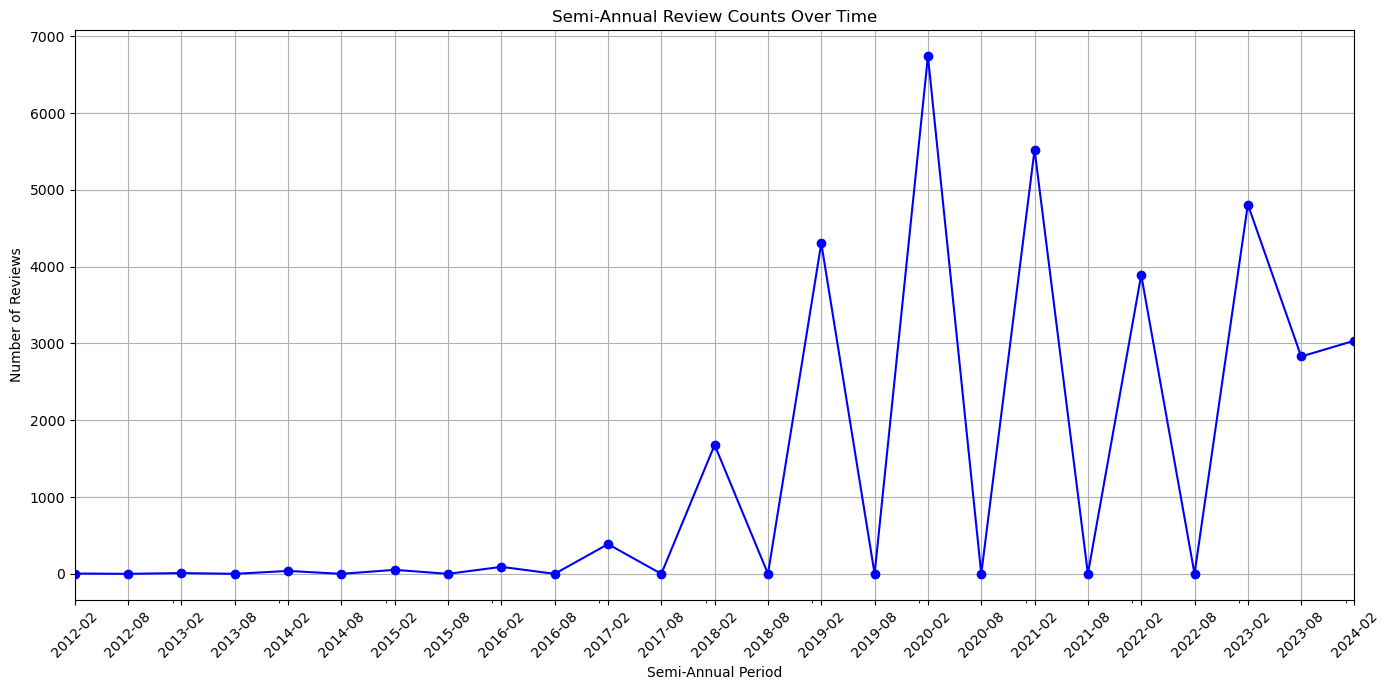

In [16]:
# from datetime import datetime, timedelta
# import pandas as pd
# import matplotlib.pyplot as plt

# # 假设 reviews_df 已经加载到 DataFrame 中
# # 定义解析评论时间字符串的函数
# def parse_review_time(review_time):
#     current_date = datetime.now()
#     review_time = review_time.replace('a ', '1 ').replace('one ', '1 ')
    
#     if 'years' in review_time or 'year' in review_time:
#         years = int(review_time.split()[0])
#         return current_date - timedelta(days=365 * years)
#     elif 'months' in review_time:
#         months = int(review_time.split()[0])
#         return current_date - timedelta(days=30 * months)
#     elif 'month' in review_time:
#         return current_date - timedelta(days=30)
#     elif 'days' in review_time or 'day' in review_time:
#         days = int(review_time.split()[0])
#         return current_date - timedelta(days=days)
#     else:
#         return current_date

# 应用函数转换评论时间到具体日期
data['approx_review_date'] = data['review_time'].apply(parse_review_time_updated)

# 设置转换后的日期为 DataFrame 的索引
data.set_index('approx_review_date', inplace=True)

# 使用 resample 方法以半年为单位聚合评论数量
semi_annual_reviews_count = data.resample('6M').size()

# 绘制评论数量随时间变化的图表
plt.figure(figsize=(14, 7))
semi_annual_reviews_count.plot(kind='line', color='blue', marker='o', linestyle='-')
plt.title('Semi-Annual Review Counts Over Time')
plt.xlabel('Semi-Annual Period')
plt.ylabel('Number of Reviews')
plt.grid(True)

# 设置X轴标签为详细日期
x_ticks_labels = semi_annual_reviews_count.index.strftime('%Y-%m')
plt.xticks(ticks=semi_annual_reviews_count.index, labels=x_ticks_labels, rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()



In [17]:
pip install matplotlib basemap

Note: you may need to restart the kernel to use updated packages.


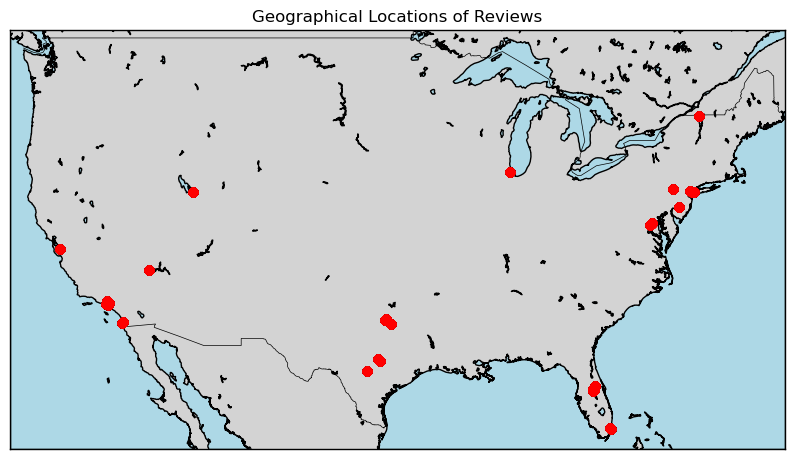

In [18]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# 初始化地图
plt.figure(figsize=(10, 8))
m = Basemap(projection='merc', llcrnrlat=24.396308, urcrnrlat=49.384358, llcrnrlon=-125.755837, urcrnrlon=-66.93457, lat_ts=20, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')

# 绘制经纬度数据为地图上的点
# 假设 reviews_df 包含您的经纬度数据
x, y = m(data['longitude'].values, data['latitude '].values)
m.scatter(x, y, marker='o', color='red', zorder=5)

plt.title('Geographical Locations of Reviews')
plt.show()


Sentiment Analysis by location

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = "Neutral"
    if scores['compound'] >= 0.05:
        sentiment = "Positive"
    elif scores['compound'] <= -0.05:
        sentiment = "Negative"
    return sentiment

# Function to get compound score
def get_compound_score(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Apply get_sentiment function to sample df
data["sentiment"] = data['processed_review_basic'].apply(get_sentiment)
data["compound_score"] = data['processed_review_basic'].apply(get_compound_score)

# Optionally, save the sample to a CSV file
data.to_csv("sentiment_and_compound_score.csv", index=False)

In [32]:
# reLoad the sentiment analysis results
sentiment_scores_df = pd.read_csv("sentiment_and_compound_score.csv")

# Calculating average compound score for each store
average_compound_score_per_store = sentiment_scores_df.groupby('store_address')['compound_score'].mean().reset_index()
average_compound_score_per_store_sorted = average_compound_score_per_store.sort_values(by='compound_score', ascending=False)

In [33]:
store_count =sentiment_scores_df['store_address'].nunique()
store_count

40

In [35]:
top_stores = average_compound_score_per_store.nlargest(5, 'compound_score')
top_stores

,store_address,compound_score
7,"114 Delancey St, New York, NY 10002, United St...",0.776033
26,"555 13th St NW, Washington, DC 20004, United S...",0.565267
31,"6875 Sand Lake Rd, Orlando, FL 32819, United S...",0.536255
12,"160 Broadway, New York, NY 10038, United States",0.504767
34,"702-2 Haddonfield-Berlin Rd, Voorhees Township...",0.280025


In [36]:
bottom_stores = average_compound_score_per_store.nsmallest(5, 'compound_score')
bottom_stores 

,store_address,compound_score
13,"1650 Washington Ave, Miami Beach, FL 33139, Un...",-0.091683
10,"151 West 34th Street (Macy's 7th Floor, New Yo...",-0.001850
21,"3501 Biscayne Blvd, Miami, FL 33137, United St...",0.045105
37,"8500 US-290, Austin, TX 78724, United States",0.085314
29,"621 Broadway, Newark, NJ 07104, United States",0.107858


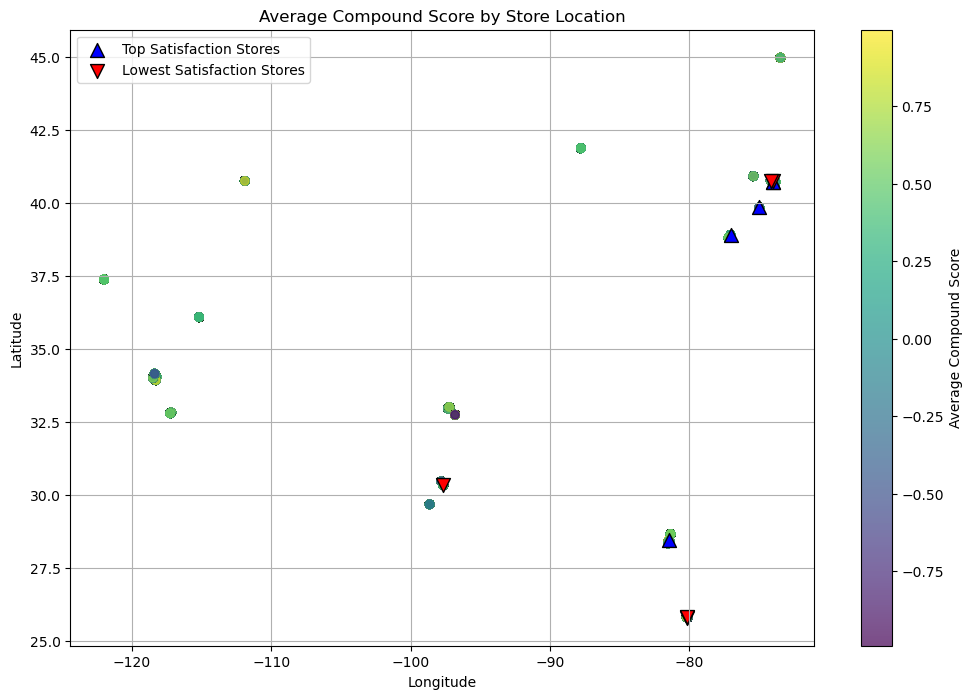

In [37]:
import pandas as pd
import matplotlib.pyplot as plt


# Using the specific stores' latitude and longitude for top and bottom stores
top_stores_direct = sentiment_scores_df.loc[sentiment_scores_df['store_address'].isin(top_stores['store_address'])]
bottom_stores_direct = sentiment_scores_df.loc[sentiment_scores_df['store_address'].isin(bottom_stores['store_address'])]


plt.figure(figsize=(12, 8))

# Plotting all stores
scatter = plt.scatter(
    sentiment_scores_df['longitude'],
    sentiment_scores_df['latitude '],
    c=sentiment_scores_df['compound_score'],
    cmap='viridis',
    alpha=0.7
)

# Highlighting the top stores by specific latitude and longitude
plt.scatter(
    top_stores_direct['longitude'].unique(),
    top_stores_direct['latitude '].unique(),
    color='blue',
    edgecolor='black',
    label='Top Satisfaction Stores',
    s=100,
    marker='^'
)

# Highlighting the bottom stores by specific latitude and longitude
plt.scatter(
    bottom_stores_direct['longitude'].unique(),
    bottom_stores_direct['latitude '].unique(),
    color='red',
    edgecolor='black',
    label='Lowest Satisfaction Stores',
    s=100,
    marker='v'
)

plt.colorbar(scatter, label='Average Compound Score')
plt.title('Average Compound Score by Store Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
Product analysis

In [45]:
#most frequent words
from collections import Counter
all_reviews = ' '.join(sentiment_scores_df['processed_review_basic'].astype(str))

words = word_tokenize(all_reviews.lower())

stop_words = set(stopwords.words('english'))
words_filtered = [word for word in words if word.isalpha() and word not in stop_words]

word_counts = Counter(words_filtered)
most_common_words = word_counts.most_common(50)

print("Most common words:", most_common_words)


Most common words: [('food', 7902), ('order', 7022), ('service', 6371), ('good', 5605), ('mcdonald', 5082), ('place', 3524), ('get', 3493), ('time', 3345), ('drive', 3295), ('one', 2838), ('fast', 2729), ('like', 2602), ('excellent', 2537), ('staff', 2484), ('go', 2374), ('great', 2331), ('always', 2306), ('customer', 2191), ('thru', 2161), ('people', 2053), ('clean', 2020), ('location', 1949), ('got', 1925), ('fry', 1812), ('minute', 1772), ('manager', 1734), ('even', 1664), ('employee', 1575), ('nice', 1568), ('never', 1528), ('mcdonalds', 1494), ('back', 1492), ('ordered', 1485), ('friendly', 1466), ('wait', 1431), ('ever', 1397), ('bad', 1341), ('rude', 1321), ('would', 1313), ('went', 1305), ('line', 1271), ('slow', 1267), ('long', 1238), ('asked', 1217), ('worst', 1203), ('take', 1186), ('wrong', 1137), ('said', 1122), ('hot', 1095), ('really', 1094)]


In [43]:
# Manually define products and their variants.
product_variants = {
    'Big Mac': ['big mac', 'mac'],
    'McChicken': ['mcchicken', 'chicken'],
    'Filet-O-Fish': ['filet-o-fish', 'fish'],
    'McNuggets': ['mcnuggets', 'nuggets'],
    'Fries': ['fries'],
    'Coffee': ['coffee', 'latte', 'espresso', 'cappuccino', 'smoothies'],
    'McFlurry': ['mcflurry', 'flurry'],
    'Breakfast': ['mcmuffin', 'breakfast', 'pancakes'],
}

product_patterns = {key: re.compile('|'.join(variants), re.IGNORECASE) for key, variants in product_variants.items()}

# Initialize an empty list to store dictionaries of the row data.
product_mentions = []

# Analyze each review, marking mentioned products.
for index, row in sentiment_scores_df.iterrows():
    for product, pattern in product_patterns.items():
        if pattern.search(row['review']):
            product_mentions.append({
                'processed_review_basic': row['processed_review_basic'],
                'compound_score': row['compound_score'],
                'product_mentioned': product
            })

# Convert the list of dictionaries to a DataFrame.
product_comments = pd.DataFrame(product_mentions)

# Display the first few rows of the resulting DataFrame.
product_comments.head()



,processed_review_basic,compound_score,product_mentioned
0,mc. crispy chicken sandwich customer service q...,0.0000,McChicken
1,repeat order 3 time drive thru still manage me...,-0.7184,Filet-O-Fish
2,repeat order 3 time drive thru still manage me...,-0.7184,Fries
3,came ordered large coffee w ice. handed cup le...,0.1027,Coffee
4,went thru drive thru. ordered. getting home no...,-0.5725,McNuggets


In [44]:
# 计算每个产品的平均复合情感分数
average_scores_by_product = product_comments.groupby('product_mentioned')['compound_score'].mean()

# 显示结果
print(average_scores_by_product.sort_values())


product_mentioned
McFlurry       -0.000037
Big Mac         0.121602
McNuggets       0.132237
Fries           0.162599
McChicken       0.163578
Filet-O-Fish    0.209124
Coffee          0.225316
Breakfast       0.234325
Name: compound_score, dtype: float64


In [59]:
# keywords_by_product = product_comments.groupby('product_mentioned')['keywords'].sum()

# # 计算并显示每个产品的前25个最常见关键词
# for product, keywords in keywords_by_product.items():
#     keyword_counts = Counter(keywords)
#     most_common_keywords = keyword_counts.most_common(25)  # 获取前25个最常见的关键词
#     print(f"{product}:")
#     for keyword, count in most_common_keywords:
#         print(f"  {keyword}: {count}")
#     print("\n")

In [58]:
# from collections import Counter
# import re
# # Step 1: Filtering comments mentioning "Big Mac"
# big_mac_comments = sentiment_scores_df[sentiment_scores_df['review'].str.contains("Big Mac", case=False, na=False)]

# # Display the first few filtered comments to verify
# big_mac_comments[['review', 'compound_score']].head()
# # Function to clean text and extract keywords
# def extract_keywords(text):
#     # Remove punctuation and split into words
#     words = re.findall(r'\w+', text.lower())
#     # Filter out stopwords and short words
#     stopwords = set(['the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'that', 'with', 'for', 'was', 'on', 'as', 'are', 'at', 'this', 'my', 'they', 'not', 'have', 'had', 'so', 'but', 'or', 'if', 'be', 'one', 'all', 'an', 'by', 'from', 'there', 'has', 'more', 'were', 'we', 'will', 'can', 'me', 'about', 'what', 'their', 'been', 'big', 'mac', 'big mac'])
#     filtered_words = [word for word in words if word not in stopwords and len(word) > 2]
#     return filtered_words

# # Extracting keywords from the Big Mac comments
# keywords = big_mac_comments['review'].apply(extract_keywords).sum()

# # Counting the occurrence of each keyword
# keyword_counts = Counter(keywords)

# # Displaying the most common keywords
# most_common_keywords = keyword_counts.most_common(20)
# most_common_keywords


In [65]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.util import ngrams

# 确保已下载所需的nltk数据
nltk.download('averaged_perceptron_tagger')

# 定制停用词列表
#custom_stop_words = set(stopwords.words('english')) | {'order', 'food', 'service', 'mcdonald', 'drive', 'place', 'get', 'got', 'one', 'time', 'like', 'go', 'would', 'could'}

def extract_descriptive_phrases(text):
    # 分词和词性标注
    tokens = word_tokenize(text.lower())
    tagged_tokens = pos_tag(tokens)
    
    # 生成bi-grams
    bi_grams = ngrams(tagged_tokens, 2)
    phrases = [' '.join([a, b]) for ((a, tag_a), (b, tag_b)) in bi_grams if tag_a.startswith('JJ') and tag_b.startswith('NN')]

    return phrases

# 应用函数，提取描述性短语
product_comments['descriptive_phrases'] = product_comments['processed_review_basic'].apply(extract_descriptive_phrases)

# 查看提取的描述性短语
product_comments[['processed_review_basic', 'descriptive_phrases']].head()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yvette/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,processed_review_basic,descriptive_phrases
0,mc. crispy chicken sandwich customer service q...,"[sandwich customer, quick p]"
1,repeat order 3 time drive thru still manage me...,"[large meal, double filet, fry cheese, need pa..."
2,repeat order 3 time drive thru still manage me...,"[large meal, double filet, fry cheese, need pa..."
3,came ordered large coffee w ice. handed cup le...,"[large coffee, large coffee, willing pay, full..."
4,went thru drive thru. ordered. getting home no...,"[thru drive, hard time, extra sauce, unhappy ...."


In [66]:
descriptive_phrases_by_product = {}

for product in product_variants:
    # 选择当前产品的所有评论
    product_reviews = product_comments[product_comments['product_mentioned'] == product]['processed_review_basic']
    # 应用 extract_descriptive_phrases 函数
    phrases_list = product_reviews.apply(extract_descriptive_phrases)
    # 汇总当前产品的所有描述性短语
    descriptive_phrases_by_product[product] = [phrase for phrases in phrases_list for phrase in phrases]

# 展示每个产品的描述性短语示例
for product, phrases in descriptive_phrases_by_product.items():
    print(f"{product}:")
    print(phrases[:25])  # 展示每个产品的前25个描述性短语
    print("\n")

Big Mac:
['wrong threw', 'broken ice', 'drive ice', 'total silence', 'full life', 'nice ..', 'drive half', 'second window', 'least dozen', 'first time', 'bad service', 'middle day', 'understood cuz', 'open bag', 'hamburger wrapper', 'fast worker', 'happy option', 'average mcd', 'hr place', 'several month', 'deep cleaning', 'sign notice', 'lazy job', 'bad habit', 'broken ice']


McChicken:
['sandwich customer', 'quick p', 'dine experience', 'table dirty', 'sandwich burnt', 'pay window', 'wanted deluxe', 'second time', 'deluxe crispy', 'single time', 'complete order', 'ny hand', 'rude face', 'tried spice', 'first time', 'thick tabasco', 'bougght southwest', 'uber eats', 'large fry', 'fry ice', 'live block', 'speak manager', 'voice mail', 'worst mcdonald', 'chicken nugget']


Filet-O-Fish:
['large meal', 'double filet', 'fry cheese', 'need pay', 'close attention', 'english need', 'fresh fish', 'filet fish', 'tartar sauce', 'extra drive', 'lol think', 'fish sandwich', 'good fry', 'oatmeal 